In [11]:
import numpy as np
from flatland.envs.rail_env import RailEnv

In [10]:
!pip install flatland-rl

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
distributed 2022.2.1 requires cloudpickle>=1.5.0, but you have cloudpickle 1.2.2 which is incompatible.



  Using cached flatland_rl-3.0.15-py2.py3-none-any.whl (2.2 MB)
  Using cached recordtype-1.4-py2.py3-none-any.whl (13 kB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  Using cached pytest_runner-6.0.0-py3-none-any.whl (7.2 kB)
  Using cached crowdai_api-0.1.22.tar.gz (9.2 kB)
  Using cached ipycanvas-0.13.1-py2.py3-none-any.whl (255 kB)
  Using cached timeout-decorator-0.5.0.tar.gz (4.8 kB)
  Using cached gym-0.14.0.tar.gz (1.6 MB)


  Created wheel for gym: filename=gym-0.14.0-py3-none-any.whl size=1637523 sha256=3b34dc8fa051c6ea76384e7f68416360731ab8867a752f3208bbb4470ba454b2
  Stored in directory: c:\users\tanma\appdata\local\pip\cache\wheels\03\22\87\b81ad7c05dbf9f9b13c0fb120d0c0c9568dcc0545e7a68bfbe
  Created wheel for crowdai-api: filename=crowdai_api-0.1.22-py2.py3-none-any.whl size=10001 sha256=8e9ead8fcc8253eac1e926613197ef1d4687819d49957121ec8aa1633b4ed2dc
  Stored in directory: c:\users\tanma\appdata\local\pip\cache\wheels\78\2a\0b\d231b4c2ae1f51c9b817ed9806b96c760e87cda33b8bece2cd
  Created wheel for timeout-decorator: filename=timeout_decorator-0.5.0-py3-none-any.whl size=5028 sha256=52a4426fd511a4ba0d49c6ed74780d15fc28f6c4b8a4c0b737d3ae3ab442182e
  Stored in directory: c:\users\tanma\appdata\local\pip\cache\wheels\5d\45\1d\a7d2bf8dfbdecd78983a3d422f2fe860316cfbae3f3b001ea5
Successfully built gym crowdai-api timeout-decorator
  Attempting uninstall: async-timeout
    Found existing installation: async-

In [19]:
import PIL
from flatland.utils.rendertools import RenderTool
from IPython.display import clear_output
from flatland.envs.rail_env import RailEnv
from flatland.envs.rail_generators import sparse_rail_generator
from flatland.envs.line_generators import sparse_line_generator
from flatland.envs.observations import GlobalObsForRailEnv

In [12]:
env = RailEnv(width=30, height=30)
obs = env.reset()
while True:
    obs, rew, done, info = env.step({
            0: np.random.randint(0, 5),
            1: np.random.randint(0, 5)
        })
    if done:
        break

In [15]:
info

{'action_required': {0: True, 1: False},
 'malfunction': {0: 0, 1: 0},
 'speed': {0: 1.0, 1: 1.0},
 'state': {0: <TrainState.READY_TO_DEPART: 1>, 1: <TrainState.WAITING: 0>}}

In [20]:
rail_generator = sparse_rail_generator(max_num_cities=2)

# Initialize the properties of the environment
random_env = RailEnv(
    width=24,
    height=24,
    number_of_agents=1,
    rail_generator=rail_generator,
    line_generator=sparse_line_generator(),
    obs_builder_object=GlobalObsForRailEnv()
)

# Call reset() to initialize the environment
observation, info = random_env.reset()

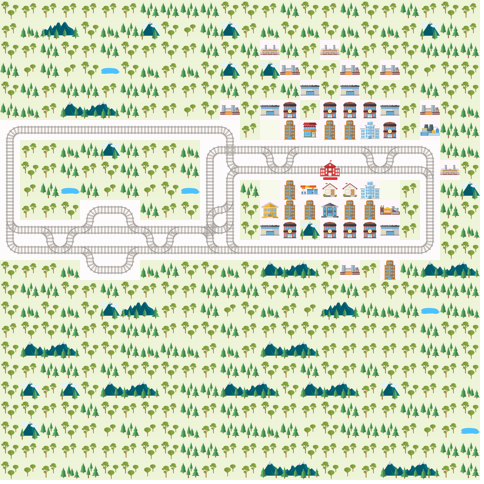

In [21]:
def render_env(env,wait=True):
    
    env_renderer = RenderTool(env, gl="PILSVG")
    env_renderer.render_env()

    image = env_renderer.get_image()
    pil_image = PIL.Image.fromarray(image)
    clear_output(wait=True)
    display(pil_image)

render_env(random_env)